<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeles" data-toc-modified-id="Modeles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeles</a></span></li><li><span><a href="#Sinus" data-toc-modified-id="Sinus-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sinus</a></span></li><li><span><a href="#Sinus-avec-tendence-linéaire-et-bruit" data-toc-modified-id="Sinus-avec-tendence-linéaire-et-bruit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sinus avec tendence linéaire et bruit</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#RNN-simple" data-toc-modified-id="RNN-simple-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>RNN simple</a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>LSTM</a></span></li><li><span><a href="#GRU" data-toc-modified-id="GRU-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>GRU</a></span></li></ul></li><li><span><a href="#Scores-TimeSeriesSplit" data-toc-modified-id="Scores-TimeSeriesSplit-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Scores TimeSeriesSplit</a></span><ul class="toc-item"><li><span><a href="#RNN-simple" data-toc-modified-id="RNN-simple-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>RNN simple</a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>LSTM</a></span></li><li><span><a href="#GRU" data-toc-modified-id="GRU-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>GRU</a></span></li></ul></li></ul></li><li><span><a href="#Temperatures-globales" data-toc-modified-id="Temperatures-globales-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Temperatures globales</a></span><ul class="toc-item"><li><span><a href="#LSTM" data-toc-modified-id="LSTM-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LSTM</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#manual-loop" data-toc-modified-id="manual-loop-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>manual loop</a></span><ul class="toc-item"><li><span><a href="#split-last" data-toc-modified-id="split-last-4.2.1.1"><span class="toc-item-num">4.2.1.1&nbsp;&nbsp;</span>split last</a></span></li></ul></li><li><span><a href="#TimeseriesGenerator" data-toc-modified-id="TimeseriesGenerator-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>TimeseriesGenerator</a></span><ul class="toc-item"><li><span><a href="#split-first" data-toc-modified-id="split-first-4.2.2.1"><span class="toc-item-num">4.2.2.1&nbsp;&nbsp;</span>split first</a></span></li><li><span><a href="#split-last" data-toc-modified-id="split-last-4.2.2.2"><span class="toc-item-num">4.2.2.2&nbsp;&nbsp;</span>split last</a></span></li></ul></li></ul></li><li><span><a href="#Conv-1-D" data-toc-modified-id="Conv-1-D-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Conv 1-D</a></span></li><li><span><a href="#LSTM-+-Conv-1D" data-toc-modified-id="LSTM-+-Conv-1D-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LSTM + Conv 1D</a></span></li><li><span><a href="#Seq2seq" data-toc-modified-id="Seq2seq-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Seq2seq</a></span></li></ul></li></ul></div>

In [60]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

import pandas as pd

# Modeles

In [374]:
from tensorflow.keras import Input
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Input, Dense, LeakyReLU
from tensorflow.keras.losses import mse

def rnn_model(units=10, input_length=1, cell_type=SimpleRNN):
    model = Sequential()
    model.add(Input(shape=(input_length,1)))
    model.add(cell_type(units))
    #model.add(cell_type(units, activation=LeakyReLU(alpha=0.3)))
    model.add(Dense(1))
    return model

def rnn_model_leaky(units=10, input_length=1, cell_type=SimpleRNN):
    model = Sequential()
    model.add(Input(shape=(input_length,1)))
    #model.add(cell_type(units))
    model.add(cell_type(units, activation=LeakyReLU(alpha=0.3)))
    model.add(Dense(1))
    return model

# Sinus

In [19]:
size=1000
x=np.arange(size)
def signal(A=0, f=1, p=0, a=0, b=0, n=0, s_bias=1, n_bias=1, mult=False):
    sine = A*np.sin(2*f*x*np.pi+p) #+ A*np.cos(2*f/2*x*np.pi+p)
    linear = a * x + b
    noise = n*np.random.normal(size=x.shape)
    if mult:
        return lambda x: linear*(sine+s_bias)*(noise+n_bias)
    return lambda x: linear+sine+noise



In [4]:
s = signal(A=1, f=(1/50))(x)

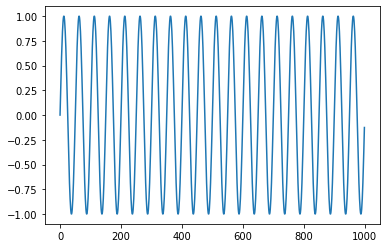

In [5]:
plt.plot(s)

In [6]:
#input_size = 10
X = s[0:-1].reshape(-1,1,1)
y = s[1:]

In [7]:
X.shape

(999, 1, 1)

In [47]:
INPUT_LENGTH = 5
EPOCH = 5
s = s.reshape(-1,1)
train_size = 900
X_train, X_test = s[:train_size], s[train_size-INPUT_LENGTH:]
train_generator = TimeseriesGenerator(X_train, X_train, length=INPUT_LENGTH, batch_size=10)
test_generator = TimeseriesGenerator(X_test, X_test, length=INPUT_LENGTH, batch_size=10)
# X = []
# y = []
# for i in range(len(s)-INPUT_LENGTH):
#     X.append(s[i:i+INPUT_LENGTH])
#     y.append(s[i+INPUT_LENGTH])
# X = np.array(X).reshape(-1,INPUT_LENGTH,1)
# y = np.array(y)
    
simple = rnn_model(units=10, input_length=INPUT_LENGTH, cell_type=SimpleRNN)
simple.compile(optimizer='adam', loss=mse)
simple.summary()
#simple.fit(X, y, batch_size=64, epochs=20, verbose=0)
simple.fit_generator(train_generator, epochs=EPOCH, verbose=0)
#pred = simple.predict(X)
score = simple.evaluate_generator(test_generator)
print(score)
trainPredict = simple.predict_generator(train_generator)
testPredict = simple.predict_generator(test_generator)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_23 (SimpleRNN)    (None, 10)                120       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
0.0009677401627413929


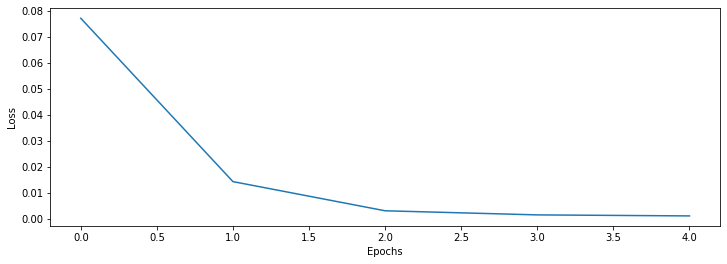

In [48]:
losses = simple.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(len(losses)),losses);

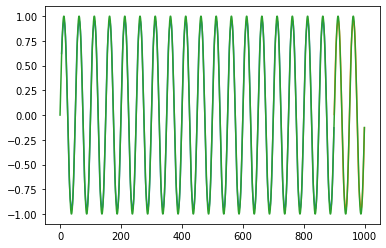

In [49]:
#%matplotlib inline
plt.plot(np.arange(trainPredict.shape[0])+INPUT_LENGTH, trainPredict)
plt.plot(range(train_size, s.shape[0]) ,testPredict)
plt.plot(s)
plt.show()

# Sinus avec tendence linéaire et bruit

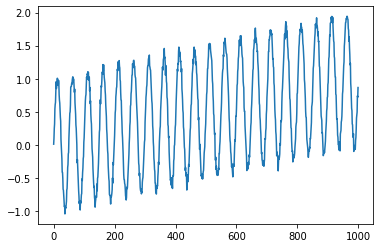

In [20]:
size=1000
x=np.arange(size)
s2 = signal(A=1, f=1/50, a=0.001, n=0.05)(x)
s2 = s2.reshape(-1,1)
# X = []
# y = []
# for i in range(len(s)-INPUT_LENGTH):
#     X.append(s2[i:i+INPUT_LENGTH])
#     y.append(s2[i+INPUT_LENGTH])
# X = np.array(X).reshape(-1,INPUT_LENGTH,1)
# y = np.array(y)

plt.plot(s2);

In [390]:
#from time import time
INPUT_LENGTH = 10
EPOCH = 5
def plot_pred(series, train_size, model, input_length=INPUT_LENGTH, batch_size=10):
    #train_size = 900
    X_train, X_test = series[:train_size], series[train_size-input_length:]
    train_generator = TimeseriesGenerator(X_train, X_train, length=input_length, batch_size=batch_size)
    test_generator = TimeseriesGenerator(X_test, X_test, length=input_length, batch_size=batch_size)
 
    #model = rnn_model(units=units, input_length=input_length, cell_type=SimpleRNN)

    model.compile(optimizer='adam', loss=mse)

    #start = time()
    model.fit_generator(train_generator, epochs=EPOCH, validation_data=test_generator, verbose=0)
    #print(f"fit: {time()-start} s")
    
    
    score = model.evaluate_generator(test_generator)
    print(score)
    
    #start = time()
    trainPredict = model.predict_generator(train_generator)
    #print(f"predict train: {time()-start} s")
    #start = time()
    testPredict = model.predict_generator(test_generator)
    #print(f"predict test: {time()-start} s")
    
    plt.figure(figsize=(12,6))
    losses = model.history.history['loss']
    val_losses = model.history.history['val_loss']
    plt.subplot(2,1,1)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(range(len(losses)),losses, label='train loss')
    plt.plot(range(len(val_losses)),val_losses, label='val loss')
    
    plt.subplot(2,1,2)
    plt.plot(series)
    plt.plot(np.arange(trainPredict.shape[0])+input_length, trainPredict)
    plt.plot(range(train_size, train_size+testPredict.shape[0]) ,testPredict)

### RNN simple

0.03951639952138066


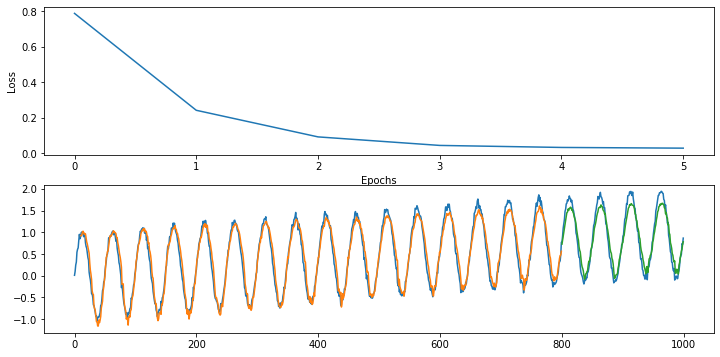

In [115]:
EPOCH = 6
plot_pred(s2, train_size=800, input_length=INPUT_LENGTH,
          model=rnn_model_leaky(units=10, input_length=INPUT_LENGTH, cell_type=SimpleRNN)
         )

### LSTM

0.022048737131990494


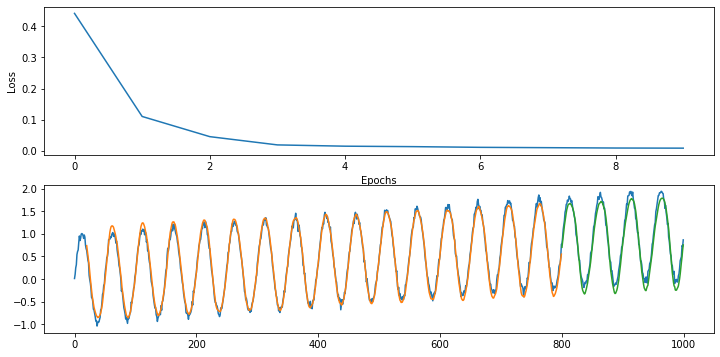

In [375]:
EPOCH = 10
plot_pred(s2, train_size=800, input_length=INPUT_LENGTH, batch_size=5,
          model=rnn_model_leaky(units=10, input_length=INPUT_LENGTH, cell_type=LSTM)
         )

### GRU

Epoch 1/10
158/158 [==============================] - 8s 52ms/step - loss: 0.4168 - val_loss: 0.3002
Epoch 2/10
158/158 [==============================] - 8s 54ms/step - loss: 0.0931 - val_loss: 0.0699
Epoch 3/10
158/158 [==============================] - 8s 54ms/step - loss: 0.0481 - val_loss: 0.0375
Epoch 4/10
158/158 [==============================] - 8s 53ms/step - loss: 0.0253 - val_loss: 0.0271
Epoch 5/10
158/158 [==============================] - 8s 54ms/step - loss: 0.0101 - val_loss: 0.0090
Epoch 6/10
158/158 [==============================] - 8s 54ms/step - loss: 0.0073 - val_loss: 0.0091
Epoch 7/10
158/158 [==============================] - 8s 53ms/step - loss: 0.0069 - val_loss: 0.0115
Epoch 8/10
158/158 [==============================] - 8s 53ms/step - loss: 0.0066 - val_loss: 0.0080
Epoch 9/10
158/158 [==============================] - 8s 53ms/step - loss: 0.0063 - val_loss: 0.0103
Epoch 10/10
158/158 [==============================] - 8s 53ms/step - loss: 0.0059 - val_lo

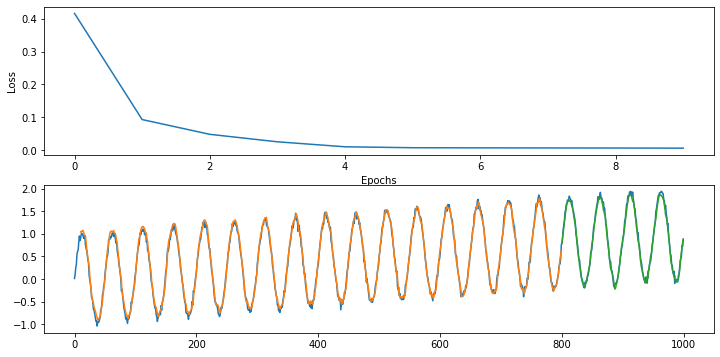

In [388]:
plot_pred(s2, train_size=800, input_length=INPUT_LENGTH, batch_size=5,
          model=rnn_model_leaky(units=10, input_length=INPUT_LENGTH, cell_type=GRU)
         )

Epoch 1/10
158/158 [==============================] - 6s 36ms/step - loss: 0.0460 - val_loss: 0.0348
Epoch 2/10
158/158 [==============================] - 6s 36ms/step - loss: 0.0256 - val_loss: 0.0204
Epoch 3/10
158/158 [==============================] - 6s 36ms/step - loss: 0.0152 - val_loss: 0.0129
Epoch 4/10
158/158 [==============================] - 6s 37ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 5/10
158/158 [==============================] - 6s 36ms/step - loss: 0.0056 - val_loss: 0.0065
Epoch 6/10
158/158 [==============================] - 6s 39ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 7/10
158/158 [==============================] - 6s 36ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 8/10
158/158 [==============================] - 6s 35ms/step - loss: 0.0052 - val_loss: 0.0057
Epoch 9/10
158/158 [==============================] - 5s 35ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 10/10
158/158 [==============================] - 6s 36ms/step - loss: 0.0051 - val_lo

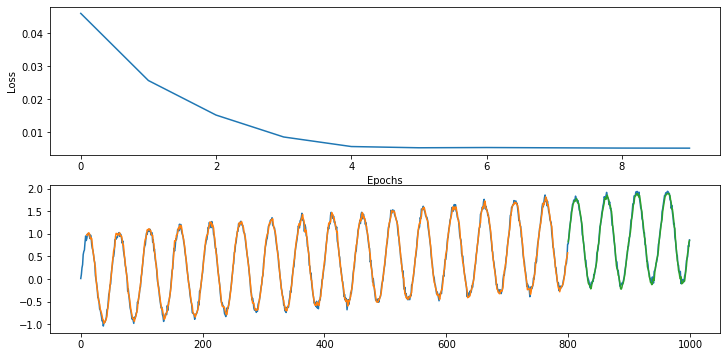

In [389]:
plot_pred(s2, train_size=800, input_length=INPUT_LENGTH, batch_size=5,
          model=rnn_model(units=10, input_length=INPUT_LENGTH, cell_type=GRU)
         )

## Scores TimeSeriesSplit

In [20]:
def score(series, model_type=SimpleRNN):
    scores = [] 
    splits = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in splits.split(X):
        X_train, X_test = series[train_index], series[test_index-INPUT_LENGTH]
        train_generator = TimeseriesGenerator(X_train, X_train, length=INPUT_LENGTH, batch_size=10)
        test_generator = TimeseriesGenerator(X_test, X_test, length=INPUT_LENGTH, batch_size=10)
    
        model = rnn_model(input_length=INPUT_LENGTH, cell_type=model_type)
        model.compile(optimizer='nadam', loss=mse)
    
        model.fit_generator(train_generator, epochs=EPOCH, verbose=0)
    
        scores.append(model.evaluate_generator(test_generator))
    return scores

### RNN simple

In [24]:
rnn_scores = score(s2, SimpleRNN)
print(rnn_scores)

[0.5548876857056337, 0.21513847250710516, 0.20308424828245358, 0.026436921866501078, 0.2529426588512519]


### LSTM

In [25]:
lstm_scores = score(s2, LSTM)
print(lstm_scores)

[0.5178221271318548, 0.2789988573640585, 0.49350621573188724, 0.4989350464414148, 0.12678219416343114]


### GRU

In [26]:
gru_scores = score(s2, GRU)
print(gru_scores)

[0.40946455738123727, 0.43032018215778994, 0.07583773875718608, 0.6291417860809494, 0.0812789847909966]


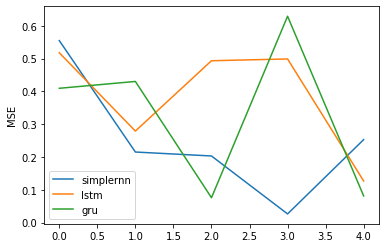

In [27]:
plt.plot(rnn_scores, label='simplernn')
plt.plot(lstm_scores, label='lstm')
plt.plot(gru_scores, label='gru')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Temperatures globales
https://data.world/data-society/global-climate-change-data/workspace/file?filename=GlobalLandTemperatures%2FGlobalTemperatures.csv

In [32]:
temp = pd.read_csv("GlobalLandTemperatures_GlobalTemperatures.csv")
temp["dt"] = temp["dt"].apply(lambda x: np.datetime64(x))
temp = temp[['dt','LandAverageTemperature']]
temp = temp.iloc[-500:]

## LSTM

11.592059874534607


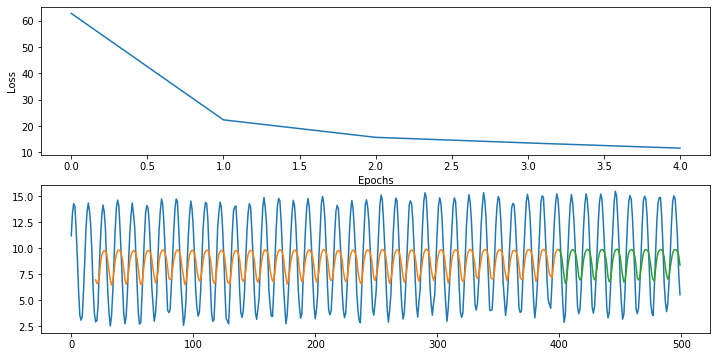

In [376]:
EPOCH = 5
plot_pred(temp['LandAverageTemperature'].values.reshape(-1,1),
          train_size=400, input_length=20, batch_size=5,
          model=rnn_model(units=30, input_length=20, cell_type=LSTM)
         )

0.2650290258228779


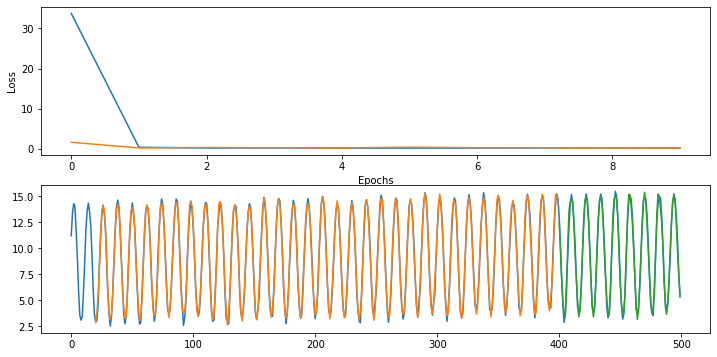

In [391]:
EPOCH = 10
plot_pred(temp['LandAverageTemperature'].values.reshape(-1,1),
          train_size=400, input_length=20, batch_size=5,
          model=rnn_model_leaky(units=30, input_length=20, cell_type=LSTM)
         )

## XGBoost

In [36]:
from xgboost import XGBRegressor

In [246]:
INPUT_LENGTH = 20
TRAINING_SIZE = 400
train_size = TRAINING_SIZE-INPUT_LENGTH

series = temp['LandAverageTemperature'].values

### manual loop

#### split last

In [251]:
X = []
y = []
for i in range(series.shape[0]-INPUT_LENGTH):
    X.append(series[i:i+INPUT_LENGTH])
    y.append(series[i+INPUT_LENGTH])
X = np.array(X).reshape(-1,INPUT_LENGTH)
y = np.array(y)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### TimeseriesGenerator

#### split first

In [257]:
train, test = series[:TRAINING_SIZE], series[TRAINING_SIZE-INPUT_LENGTH:]
train_generator = TimeseriesGenerator(train, train, length=INPUT_LENGTH, batch_size=train.shape[0])
test_generator = TimeseriesGenerator(test, test, length=INPUT_LENGTH, batch_size=test.shape[0])
X_train, y_train = train_generator[0]
X_test, y_test = test_generator[0]

#### split last

In [259]:
generator = TimeseriesGenerator(series, series, length=INPUT_LENGTH, batch_size=series.shape[0])
X_fulltrain, y_fulltrain = generator[0]
X_train, X_test = X_fulltrain[:TRAINING_SIZE-INPUT_LENGTH], X_fulltrain[TRAINING_SIZE-INPUT_LENGTH:]
y_train, y_test = y_fulltrain[:TRAINING_SIZE-INPUT_LENGTH], X_fulltrain[TRAINING_SIZE-INPUT_LENGTH:]

0.041728194802999496


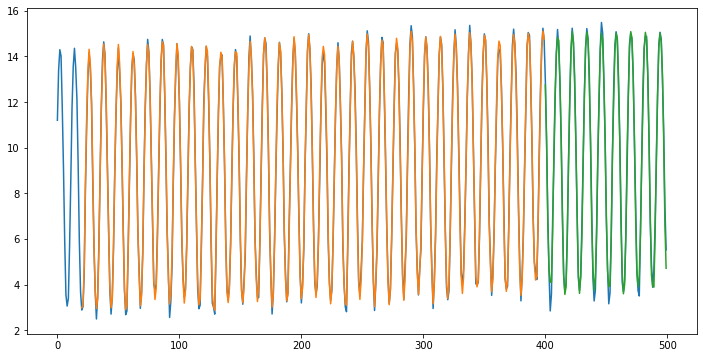

In [261]:
reg = XGBRegressor(seed=42)
reg.fit(X_train, y_train)
testPredict = reg.predict(X_test)
trainPredict = reg.predict(X_train)
print(float(mse(y_train, trainPredict)))

train_size = X_train.shape[0]
test_size = X_test.shape[0]
plt.figure(figsize=(12,6))
plt.plot(series)
plt.plot(np.arange(train_size)+INPUT_LENGTH, trainPredict)
plt.plot(np.arange(train_size, train_size+test_size)+INPUT_LENGTH ,testPredict)
plt.show()

## Conv 1-D

In [82]:
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D, Flatten

In [378]:
def conv_model(input_length):
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=3, activation=LeakyReLU(alpha=0.3), input_shape=(input_length, 1)))
    model.add(Conv1D(filters=8, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation=LeakyReLU(alpha=0.3)))
    model.add(Dense(1))
    return model
def conv_model_relu(input_length):
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(input_length, 1)))
    model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    return model

0.1355737678706646


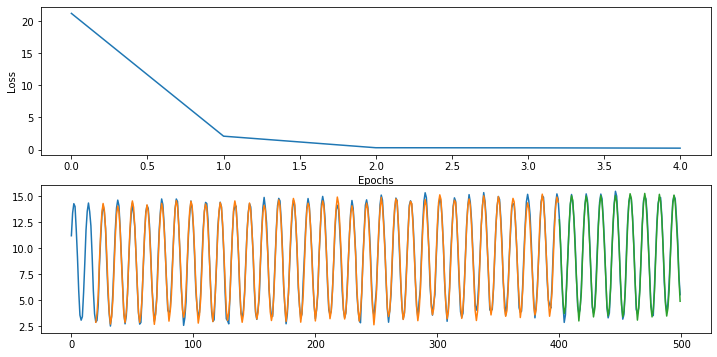

In [379]:
EPOCH = 5
plot_pred(temp['LandAverageTemperature'].values.reshape(-1,1),
          train_size=400, input_length=20, batch_size=5,
          model=conv_model_relu(input_length=20)
         )

0.17306538866832852


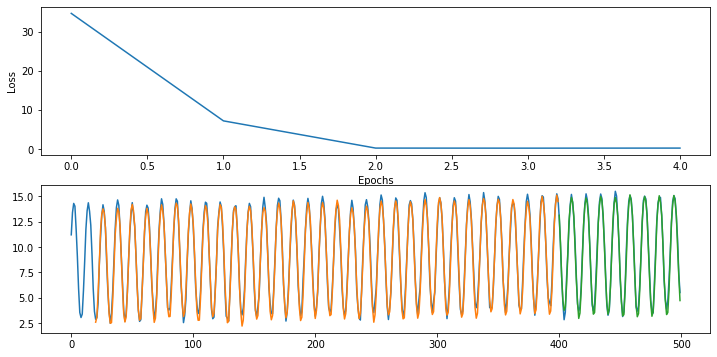

In [380]:
EPOCH = 5
plot_pred(temp['LandAverageTemperature'].values.reshape(-1,1),
          train_size=400, input_length=20, batch_size=5,
          model=conv_model(input_length=20)
         )

## LSTM + Conv 1D

In [101]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate

In [178]:
def mixte_model(input_length):
    inputs = Input(shape=(input_length, 1))
    
    conv = Conv1D(filters=8, kernel_size=3, activation=LeakyReLU(alpha=0.3))(inputs)
    conv = Conv1D(filters=8, kernel_size=3, activation=LeakyReLU(alpha=0.3))(conv)
    conv = MaxPooling1D(pool_size=2)(conv)
    conv = Flatten()(conv)
    conv = Dense(10, activation=LeakyReLU(alpha=0.3))(conv)
    #conv = Dropout(0.5)(conv)
    
    lstm = LSTM(10, activation=LeakyReLU(alpha=0.3))(inputs)
    #lstm = Dropout(0.5)(lstm)
    
    merge = Concatenate()([conv,lstm])
    #merge = Dense(10, activation=LeakyReLU(alpha=0.3))(merge)
    outputs = Dense(1)(merge)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

def stack_model(input_length):
    inputs = Input(shape=(input_length, 1))
    
    conv = Conv1D(filters=8, padding='same', kernel_size=3, activation=LeakyReLU(alpha=0.3))(inputs)
    #conv = Conv1D(filters=8, kernel_size=3, activation=LeakyReLU(alpha=0.3))(conv)
    conv = Dropout(0.2)(conv)
    
    concat = Concatenate()([conv,inputs])
    
    lstm = LSTM(10, activation=LeakyReLU(alpha=0.3))(concat)
    outputs = Dense(1)(lstm)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model

0.18861835934221743


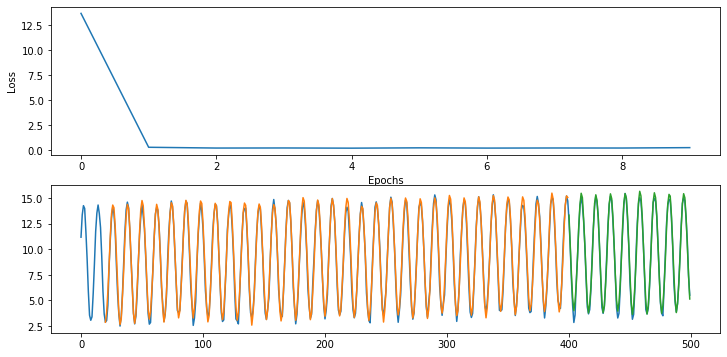

In [138]:
EPOCH = 10
plot_pred(temp['LandAverageTemperature'].values.reshape(-1,1),
          train_size=400, input_length=20, batch_size=5,
          model=mixte_model(input_length=20)
         )

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           [(None, 20, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_70 (Conv1D)              (None, 20, 8)        32          input_39[0][0]                   
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 20, 8)        0           conv1d_70[0][0]                  
__________________________________________________________________________________________________
concatenate_11 (Concatenate)    (None, 20, 9)        0           dropout_15[0][0]                 
                                                                 input_39[0][0]            

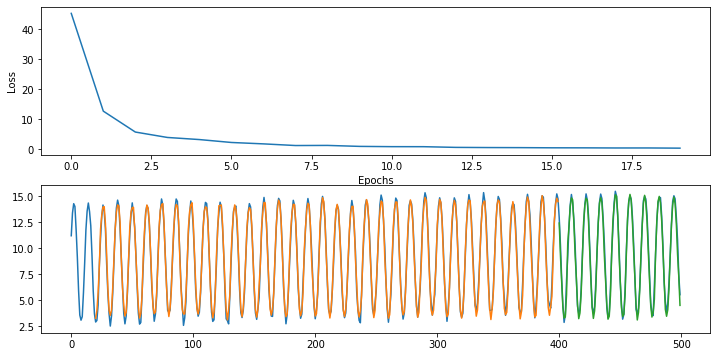

In [179]:
EPOCH = 20
plot_pred(temp['LandAverageTemperature'].values.reshape(-1,1),
          train_size=400, input_length=20, batch_size=5,
          model=stack_model(input_length=20)
         )

## Seq2seq

https://github.com/manohar029/TimeSeries-Seq2Seq-deepLSTMs-Keras/blob/master/Keras_Enc-Dec_MinTempMel.ipynb

In [400]:
from tensorflow.keras.layers import LSTMCell, RNN

In [522]:
def create_model(layers, n_in_features, n_out_features, bidirectional=False):
    
    n_layers = len(layers)
    
    ## Encoder
    encoder_inputs = Input(shape=(None, n_in_features), name='EncoderInputs')
    lstm_cells = [LSTMCell(hidden_dim) for hidden_dim in layers]
    if bidirectional:
        encoder = Bidirectional(RNN(lstm_cells, return_state=True))
        encoder_outputs_and_states = encoder(encoder_inputs)
        bi_encoder_states = encoder_outputs_and_states[1:]
        encoder_states = []
        for i in range(int(len(bi_encoder_states)/2)):
            temp = concatenate([bi_encoder_states[i],bi_encoder_states[2*n_layers + i]], axis=-1)
            encoder_states.append(temp)
    else:  
        encoder = RNN(lstm_cells, return_state=True, name='EncoderRNN')
        encoder_outputs_and_states = encoder(encoder_inputs)
        encoder_states = encoder_outputs_and_states[1:]
    
    ## Decoder
    decoder_inputs = Input(shape=(None, n_out_features), name='DecoderInputs')
    if bidirectional:
        decoder_cells = [LSTMCell(hidden_dim*2) for hidden_dim in layers]
    else:
        decoder_cells = [LSTMCell(hidden_dim) for hidden_dim in layers]
        
    decoder_lstm = RNN(decoder_cells, return_sequences=True, return_state=True, name='DecoderRNN')

    decoder_outputs_and_states = decoder_lstm(decoder_inputs,
                                          initial_state=encoder_states)
    decoder_outputs = decoder_outputs_and_states[0]

    decoder_dense = Dense(n_out_features, name='Output') 
    decoder_outputs = decoder_dense(decoder_outputs)
    
    model = Model([encoder_inputs,decoder_inputs], decoder_outputs)
    return model

In [523]:
model = create_model([10,10], 1, 1, False)

In [524]:
model.summary()

Model: "model_45"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
EncoderInputs (InputLayer)      [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
DecoderInputs (InputLayer)      [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
EncoderRNN (RNN)                [(None, 10), [(None, 1320        EncoderInputs[0][0]              
__________________________________________________________________________________________________
DecoderRNN (RNN)                [(None, None, 10), [ 1320        DecoderInputs[0][0]              
                                                                 EncoderRNN[0][1]          

In [525]:
def generate_train_sequences(x):
    
    total_start_points = len(x) - input_seq_len - output_seq_len
    start_x_idx = np.random.choice(range(total_start_points), total_start_points, replace = False)
    
    input_batch_idxs = [(range(i, i+input_seq_len)) for i in start_x_idx]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
    
    output_batch_idxs = [(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in start_x_idx]
    output_seq = np.take(x, output_batch_idxs, axis = 0)
    
    input_seq =(input_seq.reshape(input_seq.shape[0],input_seq.shape[1],n_in_features))
    output_seq=(output_seq.reshape(output_seq.shape[0],output_seq.shape[1],n_out_features))
    
    return input_seq, output_seq

In [526]:
x_train = series[:-100]
y_test = series[-100:]

In [527]:
total_loss=[]
total_val_loss=[]
def run_model(model,batches,epochs,batch_size):

    for _ in range(batches):

        input_seq, output_seq = generate_train_sequences(x_train)

        encoder_input_data = input_seq
        decoder_target_data = output_seq
        decoder_input_data = np.zeros(decoder_target_data.shape)

        history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_split=0.1, 
                             shuffle=False)
                           
        total_loss.append(history.history['loss'])
        total_val_loss.append(history.history['val_loss'])

In [528]:
model.compile('adam', loss = 'mean_squared_error')

In [529]:
input_seq_len = 20
output_seq_len = 10
n_in_features = 1
n_out_features = 1
batch_size = 10
run_model(model,batches=1, epochs=200, batch_size=10)

Train on 333 samples, validate on 37 samples
Epoch 1/200
333/333 [==============================] - 4s 13ms/sample - loss: 88.5080 - val_loss: 81.1140
Epoch 2/200
333/333 [==============================] - 1s 2ms/sample - loss: 71.3579 - val_loss: 63.4634
Epoch 3/200
333/333 [==============================] - 1s 2ms/sample - loss: 54.3660 - val_loss: 47.8637
Epoch 4/200
333/333 [==============================] - 1s 2ms/sample - loss: 42.5242 - val_loss: 39.4425
Epoch 5/200
333/333 [==============================] - 1s 2ms/sample - loss: 36.2241 - val_loss: 34.5148
Epoch 6/200
333/333 [==============================] - 1s 2ms/sample - loss: 32.1993 - val_loss: 31.0301
Epoch 7/200
333/333 [==============================] - 1s 2ms/sample - loss: 29.2182 - val_loss: 28.3262
Epoch 8/200
333/333 [==============================] - 1s 2ms/sample - loss: 26.8666 - val_loss: 26.1447
Epoch 9/200
333/333 [==============================] - 1s 2ms/sample - loss: 24.9594 - val_loss: 24.3563
Epoch 10/

333/333 [==============================] - 1s 2ms/sample - loss: 0.8903 - val_loss: 0.8963
Epoch 79/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.8393 - val_loss: 0.8474
Epoch 80/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.7928 - val_loss: 0.8013
Epoch 81/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.7524 - val_loss: 0.7612
Epoch 82/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.7173 - val_loss: 0.7267
Epoch 83/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.6862 - val_loss: 0.6970
Epoch 84/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.6585 - val_loss: 0.6713
Epoch 85/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.6336 - val_loss: 0.6486
Epoch 86/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.6111 - val_loss: 0.6283
Epoch 87/200
333/333 [==============================] - 1s 2ms/sample - loss:

333/333 [==============================] - 1s 2ms/sample - loss: 0.2641 - val_loss: 0.3960
Epoch 157/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.2629 - val_loss: 0.3952
Epoch 158/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.2617 - val_loss: 0.3945
Epoch 159/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.2605 - val_loss: 0.3937
Epoch 160/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.2594 - val_loss: 0.3929
Epoch 161/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.2583 - val_loss: 0.3921
Epoch 162/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.2572 - val_loss: 0.3912
Epoch 163/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.2562 - val_loss: 0.3904
Epoch 164/200
333/333 [==============================] - 1s 2ms/sample - loss: 0.2551 - val_loss: 0.3895
Epoch 165/200
333/333 [==============================] - 1s 2ms/sampl

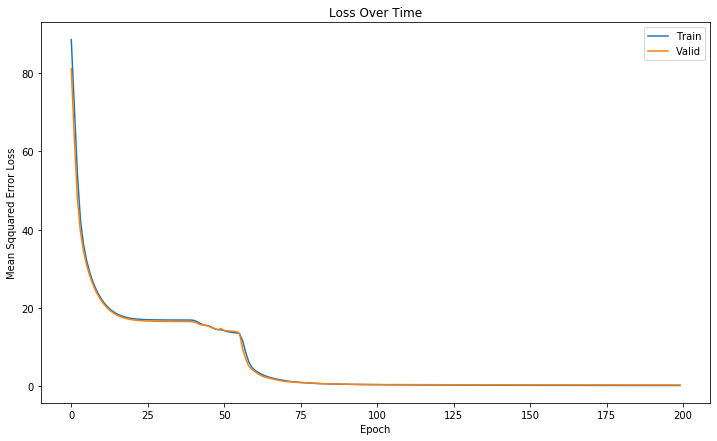

In [530]:
def plot_loss(train_loss,val_loss):
    plt.figure(figsize=(12,7))
    plt.plot(train_loss)
    plt.plot(val_loss)

    plt.xlabel('Epoch')
    plt.ylabel('Mean Sqquared Error Loss')
    plt.title('Loss Over Time')
    plt.legend(['Train','Valid'])
    plt.show()

plot_loss(np.array(total_loss).reshape(-1),
          np.array(total_val_loss).reshape(-1))

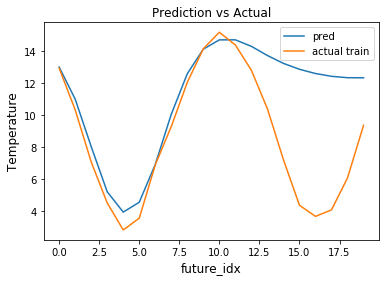

In [531]:
output_seq_len=20
input_seq_test = x_train[-input_seq_len:].reshape((1,input_seq_len,1))
output_seq_test = y_test[:output_seq_len]
decoder_input_test = np.zeros((1,output_seq_len,1))


pred = model.predict([input_seq_test,decoder_input_test]).reshape(-1)

plt.plot(pred, label = "pred")
plt.plot(output_seq_test, label = "actual train")
plt.title("Prediction vs Actual")
plt.ylabel("Temperature", fontsize=12)
plt.xlabel("future_idx", fontsize=12)
plt.legend()
plt.show()

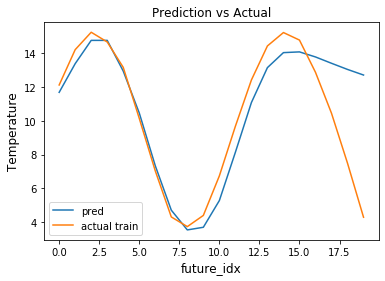

In [532]:
output_seq_len=20
input_seq_test = y_test[:input_seq_len].reshape((1,input_seq_len,1))
output_seq_test = y_test[input_seq_len:output_seq_len+input_seq_len]
decoder_input_test = np.zeros((1,output_seq_len,1))


pred = model.predict([input_seq_test,decoder_input_test]).reshape(-1)

plt.plot(pred, label = "pred")
plt.plot(output_seq_test, label = "actual train")
plt.title("Prediction vs Actual")
plt.ylabel("Temperature", fontsize=12)
plt.xlabel("future_idx", fontsize=12)
plt.legend()
plt.show()